[View in Colaboratory](https://colab.research.google.com/github/SKhan97/Machine-Learning---Bootcamp/blob/master/Logistic_Regression.ipynb)

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [26]:
from google.colab import files
files.upload() #Once again import Iris data

Saving Iris.csv to Iris (3).csv


{'Iris.csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5.2,3.4,1.4,0.2,Iris-setosa\n

In [0]:
%matplotlib inline
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn.functional as F

In [28]:
data = pd.read_csv('Iris.csv').set_index('Id')
data.head()
X = np.array(data[data.columns[:-1]])
label_dict = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
Y = np.array([label_dict[i] for i in data[data.columns[-1]]])

print(Y)
print(X.shape)
print(Y.shape)

m = X.shape[0]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150, 4)
(150,)


Covariance matrix
[[150.         -16.40538749 130.7631236  122.69304501]
 [-16.40538749 150.         -63.07741446 -53.48161344]
 [130.7631236  -63.07741446 150.         144.41356456]
 [122.69304501 -53.48161344 144.41356456 150.        ]]
Eigenvalues  [436.62271256 138.18313961  22.10299175   3.09115609]
Eigenvectors  [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


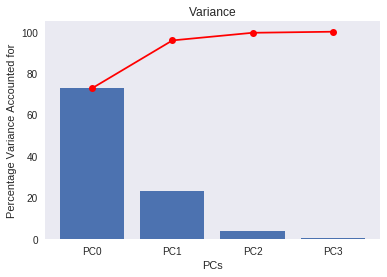

Dimension reducing matrix
[[ 0.52237162 -0.37231836 -0.72101681]
 [-0.26335492 -0.92555649  0.24203288]
 [ 0.58125401 -0.02109478  0.14089226]
 [ 0.56561105 -0.06541577  0.6338014 ]]


In [29]:
def normalise(x):
  x_std = x - np.mean(x, axis = 0)
  x_std = np.divide(x_std, np.std(x_std, axis = 0))
  return x_std

X_std = normalise(X)

def decompose(X):
  cov = np.matmul(X.T, X)
  print('Covariance matrix')
  print(cov)
  
  eig_vals, eig_vecs = np.linalg.eig(cov)
  print('Eigenvalues ', eig_vals)
  print('Eigenvectors ', eig_vecs)
  
  return eig_vals, eig_vecs, cov

eig_vals, eig_vecs, cov = decompose(X_std)

def whicheigs(eig_vals):
  total = sum(eig_vals)
  var_per = [(i/total)*100 for i in eig_vals]
  cum_var_percent = np.cumsum(var_per)
  
  fig = plt.figure()
  ax = fig.add_subplot(111)
  plt.title('Variance')
  ax.grid()
  plt.xlabel('PCs')
  plt.ylabel('Percentage Variance Accounted for')
  
  ax.plot(cum_var_percent, '-ro') #Cumulative addition, need % of total accounted for
  ax.bar(range(len(eig_vals)), var_per)
  plt.xticks(np.arange(len(eig_vals)), ('PC{}'.format(i) for i in range(len(eig_vals))))
  
  plt.show()
  
whicheigs(eig_vals)

dims = 3

def reduce(x, eig_vecs, dims):
  W = eig_vecs[:, :dims]
  print('Dimension reducing matrix')
  print(W)
  
  return np.matmul(x, W), W

X_reduce, transform = reduce(X_std, eig_vecs, dims)

In [0]:
X = torch.Tensor(X_reduce)
Y = torch.LongTensor(Y) #LongTensor simply means integer only values (need to specify if using Pytorch)

m = 110

x_train = Variable(X[0:m])
y_train = Variable(Y[0:m])

x_test = Variable(X[m:])
y_test = Variable(Y[m:])

In [0]:
class LogisticModel(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = torch.nn.Linear(dims,3)
  
  def forward(self,x):
    x = self.linear(x)
    x = F.softmax(x, dim = 1) #Dimension 1 because it needs to add up to 1 since its a probability
    return x

In [0]:
epochs = 1000
lr = 0.1

mymodel = LogisticModel()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mymodel.parameters(), lr = lr, weight_decay = 0.0001)

In [0]:
costs = []

def train(epochs):
  for epoch in range(epochs):
    h = mymodel.forward(x_train)
    
    cost = criterion(h, y_train)
    costs.append(cost.data[0])
    
    #print('Epoch: ', epoch, 'Cost: ', cost.data[0])
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
train(epochs)

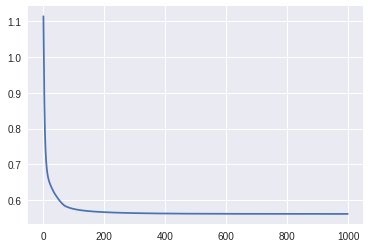

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(costs)
fig.canvas.draw()
plt.show()

In [54]:
def test():
  h = mymodel.forward(x_test)
  _, h_classes = h.data.max(1) #just call the first variable that is returned _ because it is irrelevant (no special python syntax)
  y_test_classes = y_test.data #.data gets you the tensor stored inside the variable 
  correct = torch.eq(h_classes, y_test_classes)
  accuracy = torch.sum(correct)/correct.shape[0]
  print(accuracy)

test()

0.775
